In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import os

In [3]:
import os

clip_folder1 = r'/home/user/Sahil/mean_var_kurt'
data = []
labels=  []

for filename in os.listdir(clip_folder1):
    fname = clip_folder1 + '/' + filename
    labels.append(filename[-5])
    x = np.load(fname)
    data.append(x)

In [4]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(5587, 384)
(5587,)


In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels , test_labels = train_test_split(data, labels, test_size=0.2,random_state = 1)
print (train_data.shape, train_labels.shape)
print (test_data.shape, test_labels.shape)

(4469, 384) (4469,)
(1118, 384) (1118,)


In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
initializer = tf.keras.initializers.Orthogonal()

mlp_input = Input(shape=(384,))


x = Dense(64, activation='softmax',kernel_initializer=initializer)(mlp_input)
x = Dropout(0.2)(x)
x = Dense(16, activation='softmax',kernel_initializer=initializer)(x)
x = Dropout(0.2)(x)
x = Dense(8, activation='softmax',kernel_initializer=initializer)(x)
x = Dropout(0.2)(x)
mlp_output = Dense(3, activation='softmax',kernel_initializer=initializer)(x)


model = Model(inputs=mlp_input, outputs=mlp_output)

In [8]:
regularizer = tf.keras.regularizers.l2(.01)

for layer in model.layers:
    if layer.trainable == True:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

In [9]:
opt=Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                24640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0     

In [10]:
history = model.fit(train_data, train_labels, batch_size=32, validation_data=(test_data, test_labels), epochs=100, verbose=2)

Epoch 1/100
140/140 - 1s - loss: 1.0061 - accuracy: 0.7507 - val_loss: 0.9881 - val_accuracy: 0.8050
Epoch 2/100
140/140 - 1s - loss: 0.9799 - accuracy: 0.7778 - val_loss: 0.9624 - val_accuracy: 0.8050
Epoch 3/100
140/140 - 1s - loss: 0.9555 - accuracy: 0.7814 - val_loss: 0.9381 - val_accuracy: 0.8050
Epoch 4/100
140/140 - 1s - loss: 0.9320 - accuracy: 0.7966 - val_loss: 0.9150 - val_accuracy: 0.8050
Epoch 5/100
140/140 - 1s - loss: 0.9094 - accuracy: 0.7975 - val_loss: 0.8930 - val_accuracy: 0.8050
Epoch 6/100
140/140 - 1s - loss: 0.8882 - accuracy: 0.7975 - val_loss: 0.8723 - val_accuracy: 0.8050
Epoch 7/100
140/140 - 1s - loss: 0.8695 - accuracy: 0.7975 - val_loss: 0.8527 - val_accuracy: 0.8050
Epoch 8/100
140/140 - 1s - loss: 0.8524 - accuracy: 0.7975 - val_loss: 0.8343 - val_accuracy: 0.8050
Epoch 9/100
140/140 - 1s - loss: 0.8363 - accuracy: 0.7975 - val_loss: 0.8170 - val_accuracy: 0.8050
Epoch 10/100
140/140 - 1s - loss: 0.8173 - accuracy: 0.7975 - val_loss: 0.8006 - val_accura

Epoch 82/100
140/140 - 1s - loss: 0.6327 - accuracy: 0.7975 - val_loss: 0.6022 - val_accuracy: 0.8050
Epoch 83/100
140/140 - 1s - loss: 0.6298 - accuracy: 0.7975 - val_loss: 0.6021 - val_accuracy: 0.8050
Epoch 84/100
140/140 - 1s - loss: 0.6314 - accuracy: 0.7975 - val_loss: 0.6020 - val_accuracy: 0.8050
Epoch 85/100
140/140 - 1s - loss: 0.6333 - accuracy: 0.7975 - val_loss: 0.6019 - val_accuracy: 0.8050
Epoch 86/100
140/140 - 1s - loss: 0.6335 - accuracy: 0.7975 - val_loss: 0.6019 - val_accuracy: 0.8050
Epoch 87/100
140/140 - 1s - loss: 0.6352 - accuracy: 0.7975 - val_loss: 0.6018 - val_accuracy: 0.8050
Epoch 88/100
140/140 - 1s - loss: 0.6347 - accuracy: 0.7975 - val_loss: 0.6018 - val_accuracy: 0.8050
Epoch 89/100
140/140 - 1s - loss: 0.6329 - accuracy: 0.7975 - val_loss: 0.6018 - val_accuracy: 0.8050
Epoch 90/100
140/140 - 1s - loss: 0.6303 - accuracy: 0.7975 - val_loss: 0.6017 - val_accuracy: 0.8050
Epoch 91/100
140/140 - 1s - loss: 0.6350 - accuracy: 0.7975 - val_loss: 0.6017 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


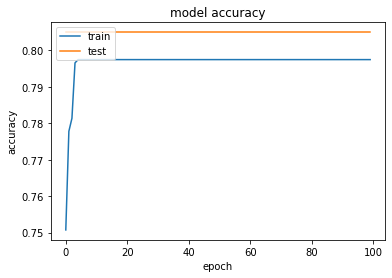

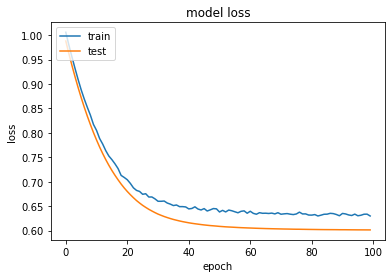

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()